Imports & stuff

In [1]:
import torchvision.transforms as transforms
# Import required libraries
import torch
import cv2
import os

In [2]:
root_path = '../'
dir_path = root_path+'validation-dataset/'
print(dir_path)

../validation-dataset/


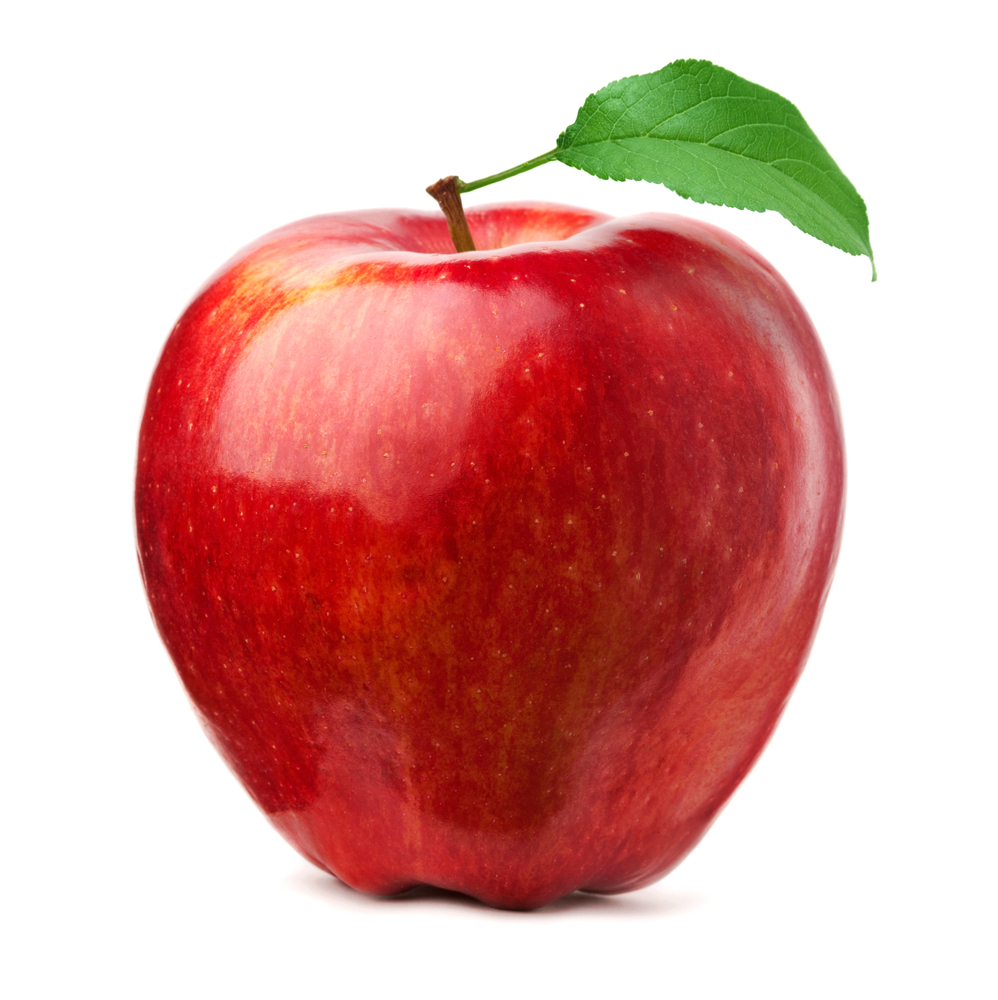

In [5]:
image_path = '../sample_images/img1.jpg'
save_path = '../sample_images/results/result1.jpg'
img = Image.open(image_path)
img

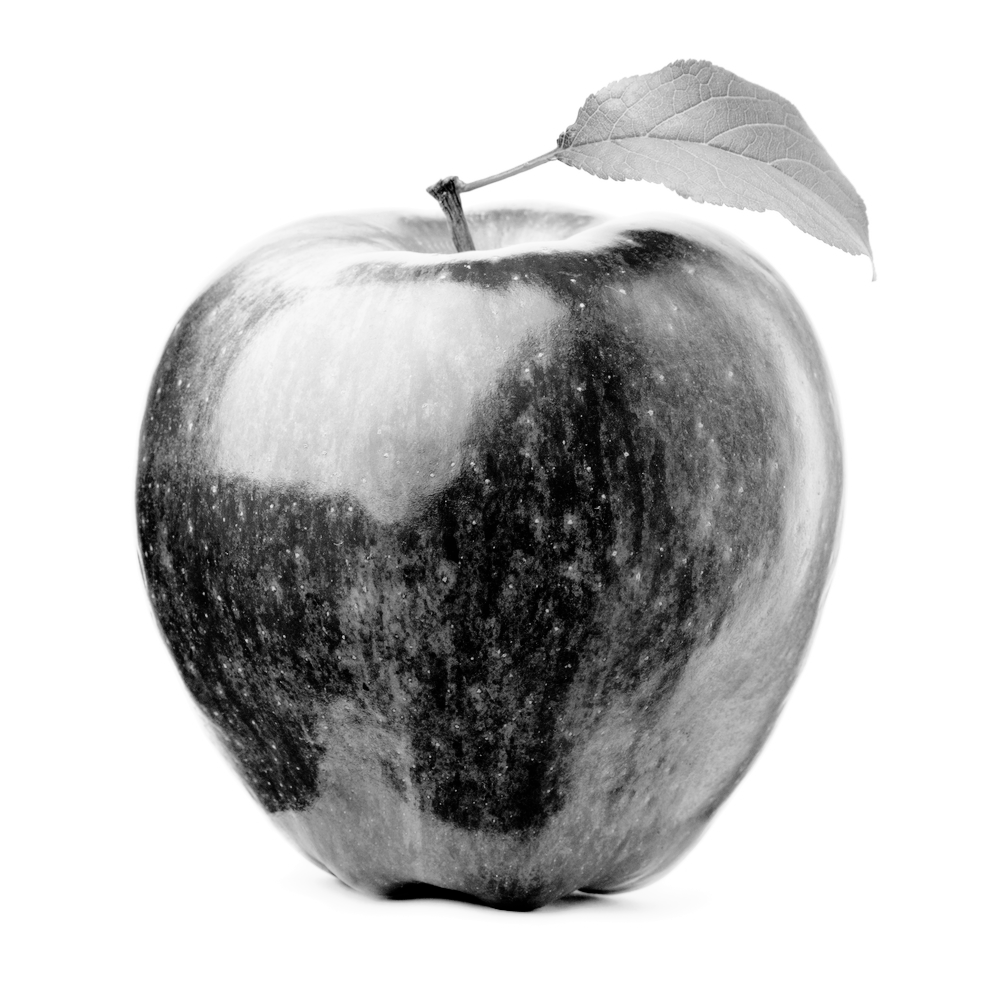

In [7]:
# img = Image.open(img_dir+IMGS_NAME[idImage])
img = img.convert('L')
img = ImageOps.equalize(img, mask=None)
img
# img.save(save_path)


In [3]:
from PIL import Image, ImageOps

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)
#len(IMGS_NAME)
for idImage in range (len(IMGS_NAME)):    
    # img_converted = cv2.imread(img_dir+IMGS_NAME[idImage])
    img = Image.open(img_dir+IMGS_NAME[idImage])
    img = img.convert('L')
    img = ImageOps.equalize(img, mask=None)
    
    transform = transforms.Compose([
        transforms.ToTensor()
    ])    
    
    # transform = transforms.PILToTensor()
    
    t_img = transform(img)

    model.eval()
    with torch.no_grad():
        prediction=model([t_img.to(device)])

    QUANT_DETECTION=len(prediction[0]['masks'])
        # print(f"Quantidade de predições: {QUANT_DETECTION}")
        # print(type(prediction[0]))
        # print(prediction[0].keys())
        # print(f"Labels: {prediction[0]['labels']}")
        # print(f"Scores: {prediction[0]['scores']}")
        # print(f"Mask: {prediction[0]['masks']}")
        # np.save(root_path+"/inferências/3CR/"+IMGS_NAME[idImage].split('.')[0]+".npy", img)
        # np.save(root_path+"/inferências/3CR/prediction_"+IMGS_NAME[idImage].split('.')[0]+".npy", prediction[0])

    #t_img=Image.fromarray(t_img.mul(255).permute(1,2,0).numpy())

    #pred = prediction[0]

    trMASK=0.40
    confidence=0.50
    x=0
    # img = imagem
    width, height = img.size
    pred = prediction[0]
    colors=['red','blue','green','yellow','gray','orange','pink','brown','purple','white','black','beige','darkgray','darkred','darkblue','darkgreen','darkyellow']
    #print(len(colors))
    if len(pred['labels']) > 0:
        #print (len(pred['labels']))
        mask_labels=[]
        count_cor=0
        for n in range(len(pred['labels'])):
        #print(pred['scores'][n])
            if pred['scores'][n]>=confidence:
                if not pred['labels'][n] in mask_labels:
                    mask_labels.append(pred['labels'][n])
                    mask = pred['masks'].cpu().numpy()[n][0]>trMASK
                    #if QUANT_DETECTION>=2:
                    #mask = pred['masks'].cpu().numpy()[n][1]>trMASK
                    mask = (mask*200).astype(np.uint8)
                    #print(len(mask_labels))

                    mask = Image.fromarray(mask).convert('L')
                    img2 = Image.new(mode='RGB',size=(width, height),color=colors[len(mask_labels)])
                    count_cor+=1

                    img = Image.composite(img2,img,mask)
                    # image = Image.open(img_dir+IMGS_NAME[idImage])


        #if QUANT_DETECTION>=2:
          #cv2_imshow(np.asarray(img))
    
    # SAVING THE IMAGE
    image_save_path = SAVE_INF_DIR+'/'+IMGS_NAME[idImage].split('.')[0]#+'/'#+IMGS_NAME[idImage].split('.')[1]
    if not os.path.exists(os.path.dirname(image_save_path)):
        os.makedirs(os.path.dirname(image_save_path))
    img.save(SAVE_INF_DIR+'/'+IMGS_NAME[idImage].split('.')[0]+'.'+IMGS_NAME[idImage].split('.')[1])


cuda


NameError: name 'IMGS_NAME' is not defined